# <span style="color:red;">Introduction</span>

According to the article "What’s the Difference Between BPD and Bipolar Disorder?" by PsychCentral('https://psychcentral.com/disorders/bpd-vs-bipolar-disorder'),

<span style="color:blue;">***Borderline personality disorder (BPD) and bipolar disorder are often confused for each other. While they’re two separate conditions, they do share some similarities.***</span>

<span style="color:blue;">*Because of their similarities, some people receive a diagnosis of bipolar disorder when their symptoms better match BPD criteria, or vice versa.*</span>

<span style="color:blue;">*The National Institute of Mental Health reports that, based on data from 2001 to 2003, around 2.8%Trusted Source of U.S. adults may live with bipolar disorder each year, and around 1.4%Trusted Source may live with BPD. Still, our data on BPD are imprecise because of the relatively high rate of misdiagnosis.*</span>

<span style="color:blue;">*According to an older studyTrusted Source, 40% of the people who met the diagnostic criteria for BPD, but not for bipolar disorder, were misdiagnosed with bipolar II disorder.*</span>

<span style="color:blue;">*BPD and bipolar disorder both come with challenges, but you can live well and manage either condition. Getting the most accurate diagnosis can help you and your treatment team figure out what will work best for you.*</span>

So I tried to find how difficult it is to classify BPD and Bipolar in SNS.

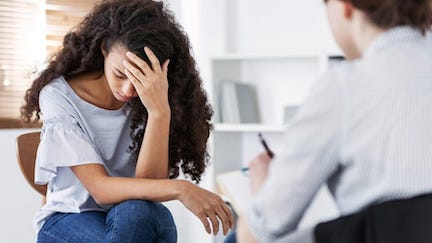

image from https://www.forbes.com/health/mind/bpd-vs-bipolar/

# <span style="color:red;">Importing</span>

In [1]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import re
import string
from wordcloud import WordCloud
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from scikitplot.metrics import plot_confusion_matrix, plot_roc

In [2]:
df=pd.read_csv('/kaggle/input/mental-disorders-identification-reddit-nlp/mental_disorders_reddit.csv')

In [3]:
df.head()

title  \
0  Life is so pointless without others   
1                           Cold rage?   
2                I don’t know who I am   
3              HELP! Opinions! Advice!   
4                                 help   

                                            selftext  created_utc  over_18  \
0  Does anyone else think the most important part...   1650356960    False   
1  Hello fellow friends 😄\n\nI'm on the BPD spect...   1650356660    False   
2  My [F20] bf [M20] told me today (after I said ...   1650355379    False   
3  Okay, I’m about to open up about many things I...   1650353430    False   
4                                          [removed]   1650350907    False   

  subreddit  
0       BPD  
1       BPD  
2       BPD  
3       BPD  
4       BPD

# <span style="color:red;">Data Preprocessing</span>

In [4]:
print(df.shape)

(701787, 5)


* Count NaN

In [5]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

df.isnull().sum()

title             46
selftext       33691
created_utc        0
over_18            0
subreddit          0
dtype: int64

* Drop NaN

In [6]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

df=df.dropna(how='any')

* Count each values of subreddit' and  visualize them

In [7]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

df['subreddit'].value_counts()

BPD              233119
Anxiety          167032
depression       156708
bipolar           46666
mentalillness     44249
schizophrenia     20280
Name: subreddit, dtype: int64

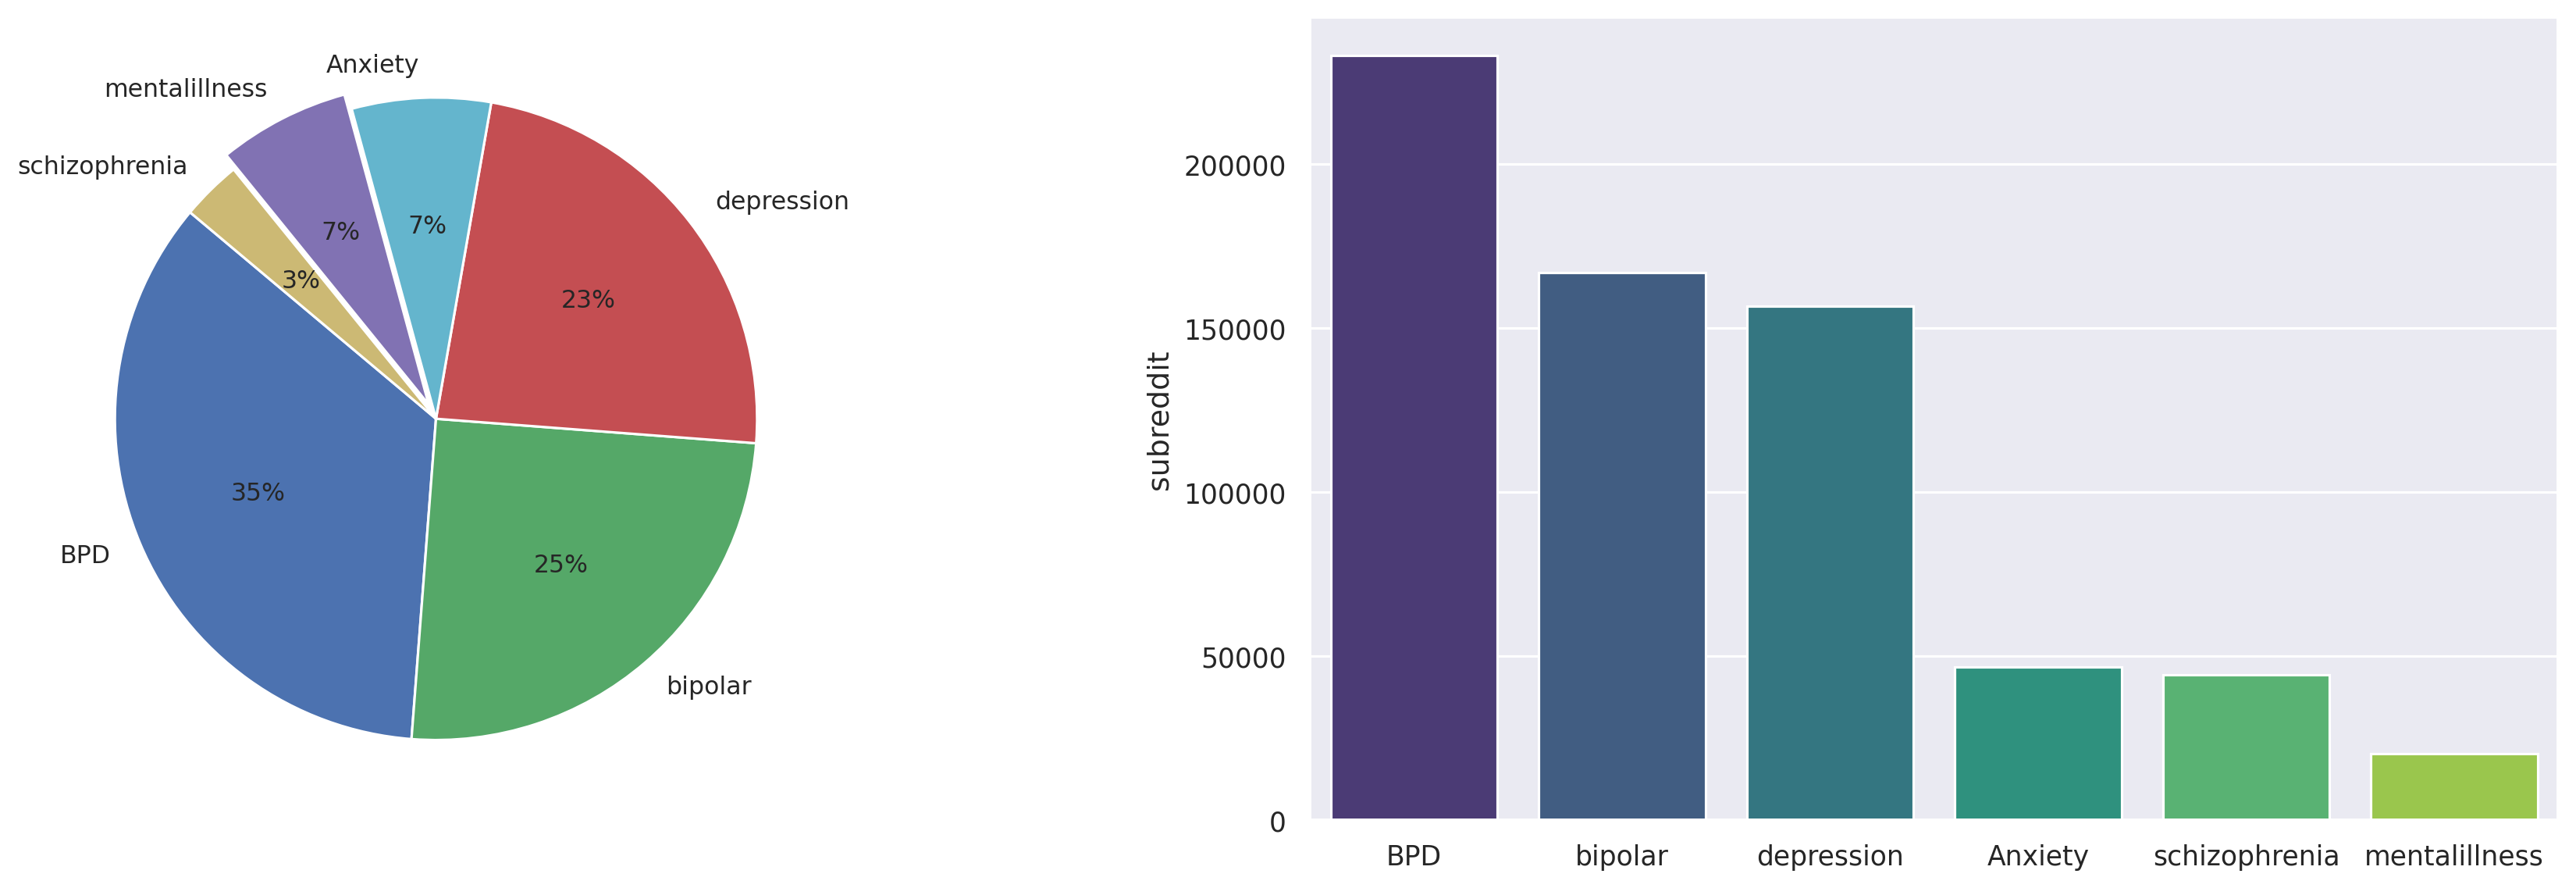

In [8]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

labels =['BPD', 'bipolar', 'depression', 'Anxiety', 'mentalillness','schizophrenia']
sizes = [233119, 167032, 156708,  46666,  44249, 20280]
custom_colours = ['b', 'g','r','c','m','y']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 10}, startangle=140, 
       autopct='%1.0f%%', colors=custom_colours, explode=[0,0,0,0,0.05,0])

plt.subplot(1, 2, 2)
sns.barplot(x = df['subreddit'].unique(), y = df['subreddit'].value_counts(), palette= 'viridis')

plt.show()

BPD occupies 35% and Bipolar occupies 25%.

* Count words and chars of 'title'

In [9]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

df['title_total'] = df['title'].apply(lambda x: len(x.split()))

def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

df['title_chars'] = df["title"].apply(count_total_words)

In [10]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

df.head()

title  \
0  Life is so pointless without others   
1                           Cold rage?   
2                I don’t know who I am   
3              HELP! Opinions! Advice!   
4                                 help   

                                            selftext  created_utc  over_18  \
0  Does anyone else think the most important part...   1650356960    False   
1  Hello fellow friends 😄\n\nI'm on the BPD spect...   1650356660    False   
2  My [F20] bf [M20] told me today (after I said ...   1650355379    False   
3  Okay, I’m about to open up about many things I...   1650353430    False   
4                                          [removed]   1650350907    False   

  subreddit  title_total  title_chars  
0       BPD            6           30  
1       BPD            2            9  
2       BPD            6           16  
3       BPD            3           21  
4       BPD            1            4

* Count words and chars of 'selftext'

In [11]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

df['text_total'] = df['selftext'].apply(lambda x: len(x.split()))

def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

df['text_chars'] = df["selftext"].apply(count_total_words)

In [12]:
df

title  \
0                     Life is so pointless without others   
1                                              Cold rage?   
2                                   I don’t know who I am   
3                                 HELP! Opinions! Advice!   
4                                                    help   
...                                                   ...   
701779             I really need to talk to a therapist..   
701781                                        I have pica   
701782  Where can you go to get help for someone menta...   
701783                              I am rooster illusion   
701786                                 crazy motherfucker   

                                                 selftext  created_utc  \
0       Does anyone else think the most important part...   1650356960   
1       Hello fellow friends 😄\n\nI'm on the BPD spect...   1650356660   
2       My [F20] bf [M20] told me today (after I said ...   1650355379   
3       Okay, I’m about to open up about many things I...   1650353430   
4                                               [removed]   1650350907   
...                                                   ...          ...   
701779  I can't afford a real session and it's 11 PM. ...   1415332108   
701781  Hello. \n         I'm taking steps to get rid ...   1414896638   
701782  Someone (a war veteran) I know is mentally ill...   1396298261   
701783                                                AMA   1344639905   
701786  so i have a lot of random impluses. crazy shit...   1321506737   

        over_18      subreddit  title_total  title_chars  text_total  \
0         False            BPD            6           30          74   
1         False            BPD            2            9         517   
2         False            BPD            6           16         145   
3         False            BPD            3           21         821   
4         False            BPD            1            4           1   
...         ...            ...          ...          ...         ...   
701779    False  mentalillness            8           31          24   
701781    False  mentalillness            3            9          67   
701782    False  mentalillness           18           79          87   
701783    False  mentalillness            4           18           1   
701786    False  mentalillness            2           17         143   

        text_chars  
0              310  
1             2259  
2              545  
3             3282  
4                9  
...            ...  
701779          95  
701781         267  
701782         378  
701783           3  
701786         545  

[668054 rows x 9 columns]

# <span style="color:red;">Plotting the number of words and chars of 'title' and 'selftext' by 'subreddit'</span>

* Kdeplot of the number of word of 'title' by 'subreddit'

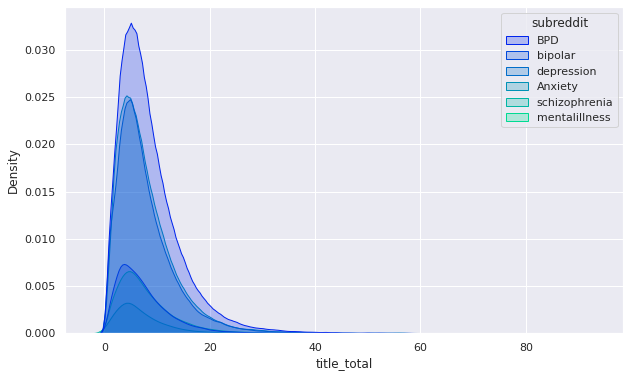

In [13]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

plt.figure(figsize = (10, 6))
sns.kdeplot(x = df['title_total'], hue= df['subreddit'], palette= 'winter', shade = True)
plt.show()

* Kdeplot of the number of char of 'title' by 'subreddit'

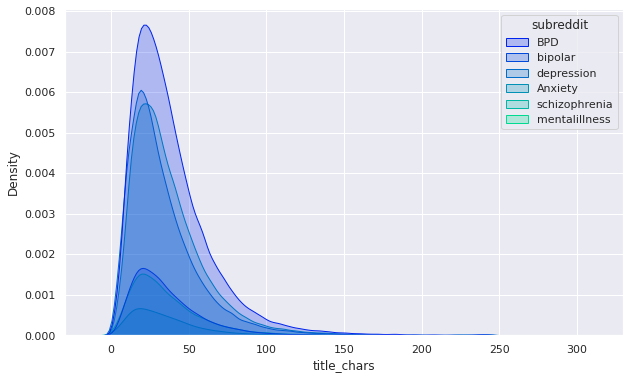

In [14]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

plt.figure(figsize = (10, 6))
sns.kdeplot(x = df['title_chars'], hue= df['subreddit'], palette= 'winter', shade = True)
plt.show()

* Kdeplot of the number of word of 'selftext' by 'subreddit'

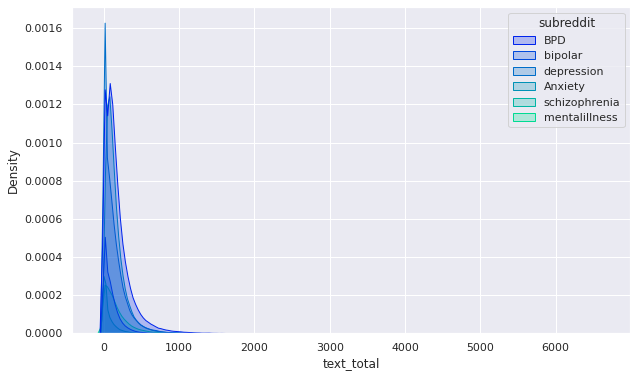

In [15]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

plt.figure(figsize = (10, 6))
sns.kdeplot(x = df['text_total'], hue= df['subreddit'], palette= 'winter', shade = True)
plt.show()

* Kdeplot of the number of char of 'selftext' by 'subreddit'

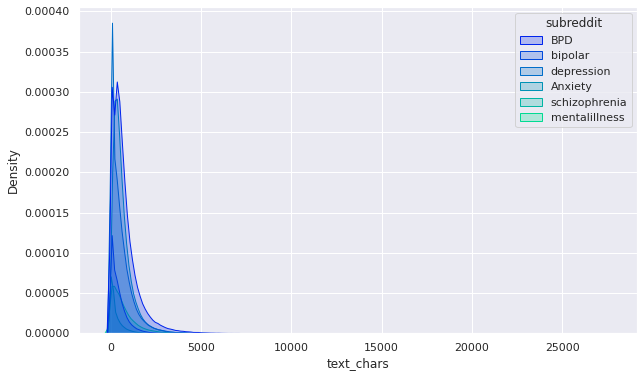

In [16]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

plt.figure(figsize = (10, 6))
sns.kdeplot(x = df['text_chars'], hue= df['subreddit'], palette= 'winter', shade = True)
plt.show()

# <span style="color:red;">Data Downsizing</span>

The number of data is 668,054. It is very large and takes a lot of time to process. So I made it to 10,000 samples.

In [17]:
df=df.sample(n=10000, random_state=0)

In [18]:
df['subreddit'].value_counts()

BPD              3534
Anxiety          2464
depression       2323
bipolar           711
mentalillness     685
schizophrenia     283
Name: subreddit, dtype: int64

# <span style="color:red;">Recategorizing 'subreddit' into 'BPD', 'bipolar' and 'others'</span>

In [19]:
def mental_disorders(ex):
    if ex=='BPD':
        return 'BPD'
    elif ex=='bipolar':
        return 'bipolar'
    else:
        return 'others'

In [20]:
df['subreddit']=df['subreddit'].apply(mental_disorders)

In [21]:
df.head()

title  \
323568                     I really need some support ; (   
187463  the version of me that my SO knows is differen...   
8873                         I really need to reach my FP   
139778  Been really stressed out about my new job and ...   
442531  Mental health treatments/systems are failing p...   

                                                 selftext  created_utc  \
323568  I’m just an emotional wreck. I really need all...   1655737392   
187463  around my SO im so happy and optimistic. i smi...   1556664207   
8873    I need to talk to my FP tonight. I texted him ...   1638365427   
139778                       So anyway, how are you guys?   1595898375   
442531                                          [removed]   1638272185   

        over_18 subreddit  title_total  title_chars  text_total  text_chars  
323568    False    others            7           24          14          56  
187463    False       BPD           16           66         199         779  
8873      False       BPD            7           22          66         255  
139778    False       BPD           57          244           6          23  
442531    False    others            6           46           1           9

# <span style="color:red;">'title' and 'selftext' preprocessing</span>

* 'title' preprocessing

In [22]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

def convert_lowercase(text):
    text = text.lower()
    return text

df['title'] = df['title'].apply(convert_lowercase)

In [23]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

df['title'] = df['title'].apply(remove_url)

In [24]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

df['title'] = df['title'].apply(remove_punc)

In [25]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

def remove_stopwords(text):
    new_list = []
    words = word_tokenize(text)
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)

df['title'] = df['title'].apply(remove_stopwords)

In [26]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

def perform_stemming(text):
    stemmer = PorterStemmer()
    new_list = []
    words = word_tokenize(text)
    for word in words:
        new_list.append(stemmer.stem(word))

    return " ".join(new_list)

df['title'] = df['title'].apply(perform_stemming)

In [27]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

df['Total Title After Transformation'] = df['title'].apply(lambda x: np.log(len(x.split())))

* 'selftext' preprocessing

In [28]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

def convert_lowercase(text):
    text = text.lower()
    return text

df['selftext'] = df['selftext'].apply(convert_lowercase)

In [29]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

df['selftext'] = df['selftext'].apply(remove_url)

In [30]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

df['selftext'] = df['selftext'].apply(remove_punc)

In [31]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

def remove_stopwords(text):
    new_list = []
    words = word_tokenize(text)
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)

df['selftext'] = df['selftext'].apply(remove_stopwords)

In [32]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

def perform_stemming(text):
    stemmer = PorterStemmer()
    new_list = []
    words = word_tokenize(text)
    for word in words:
        new_list.append(stemmer.stem(word))

    return " ".join(new_list)

df['selftext'] = df['selftext'].apply(perform_stemming)

In [33]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

df['Total Text After Transformation'] = df['selftext'].apply(lambda x: np.log(len(x.split())))

In [34]:
df.head()

title  \
323568                                realli need support   
187463            version know differ version friend know   
8873                                 realli need reach fp   
139778  realli stress new job last two day ive rumin s...   
442531          mental health treatmentssystem fail peopl   

                                                 selftext  created_utc  \
323568               ’ emot wreck realli need support get   1655737392   
187463  around im happi optimist smile giggl gener muc...   1556664207   
8873    need talk fp tonight text monday ask hed time ...   1638365427   
139778                                         anyway guy   1595898375   
442531                                              remov   1638272185   

        over_18 subreddit  title_total  title_chars  text_total  text_chars  \
323568    False    others            7           24          14          56   
187463    False       BPD           16           66         199         779   
8873      False       BPD            7           22          66         255   
139778    False       BPD           57          244           6          23   
442531    False    others            6           46           1           9   

        Total Title After Transformation  Total Text After Transformation  
323568                          1.098612                         1.945910  
187463                          1.791759                         4.465908  
8873                            1.386294                         3.401197  
139778                          3.178054                         0.693147  
442531                          1.609438                         0.000000

# <span style="color:red;">'title' and 'selftext'  WordCloud by 'subreddit'</span>

* 'title' of 'BPD' WordCloud

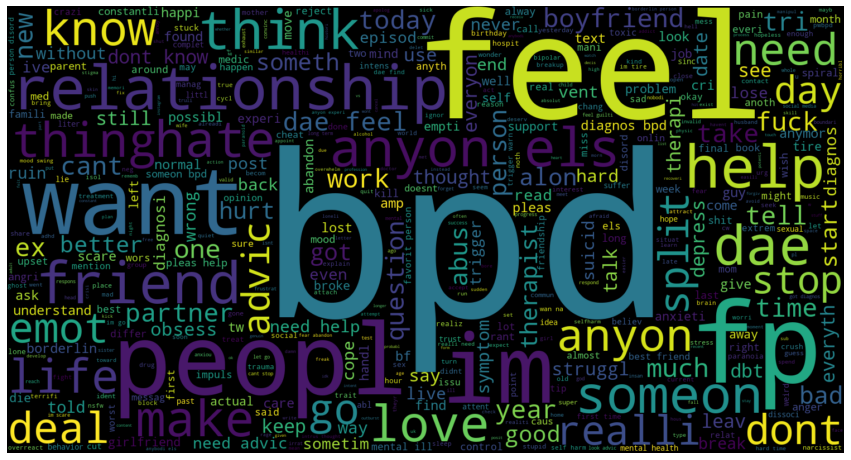

In [35]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

text = " ".join(df[df['subreddit'] == 'BPD']['title'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

* 'title' of 'bipolar' WordCloud

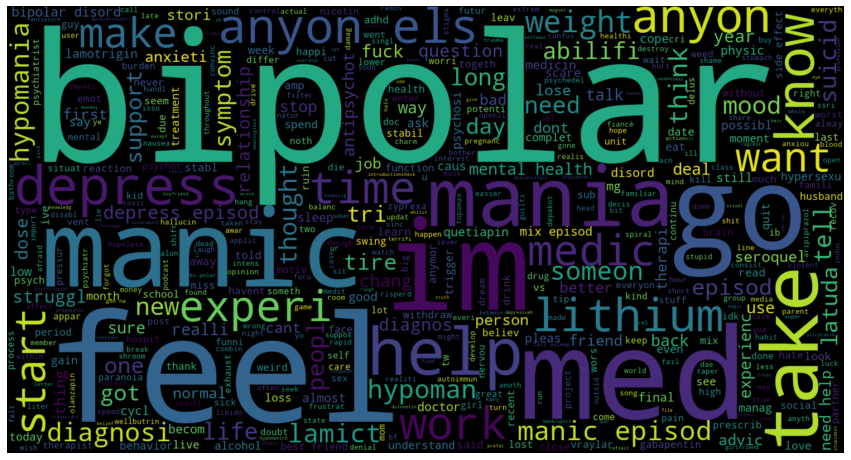

In [36]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

text = " ".join(df[df['subreddit'] == 'bipolar']['title'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

* 'title' of 'others' WordCloud

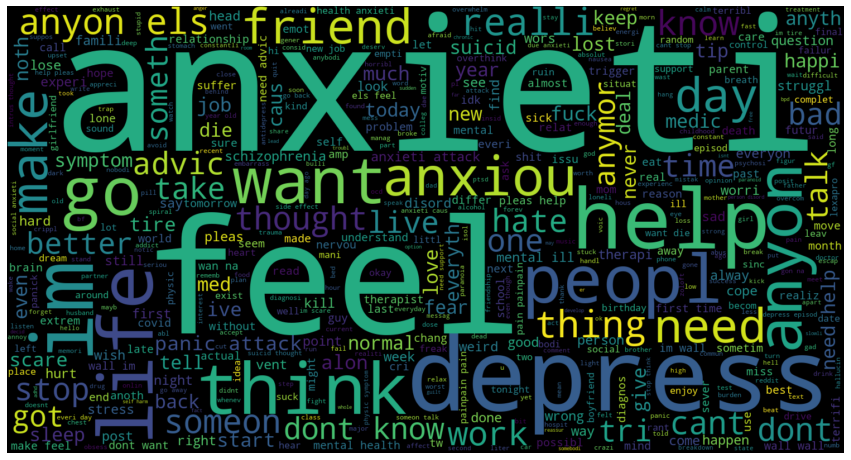

In [37]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

text = " ".join(df[df['subreddit'] == 'others']['title'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

* 'selftext' of 'BPD' WordCloud

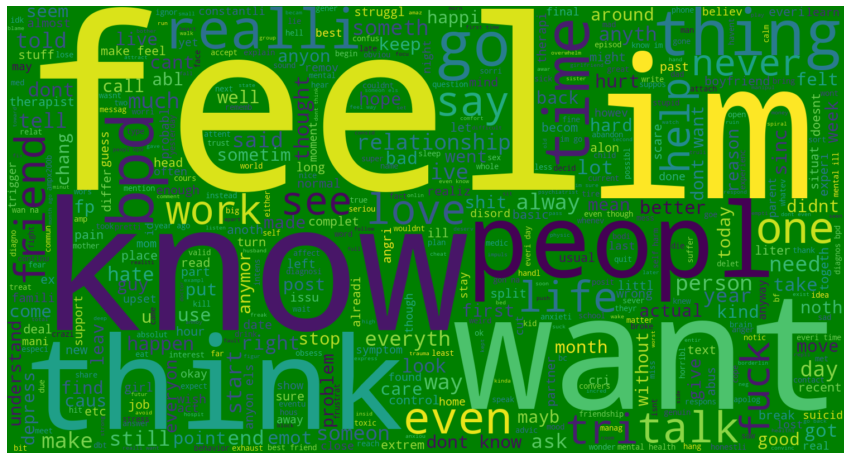

In [38]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

text = " ".join(df[df['subreddit'] == 'BPD']['selftext'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="green", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

* 'selftext' of 'bipolar' WordCloud

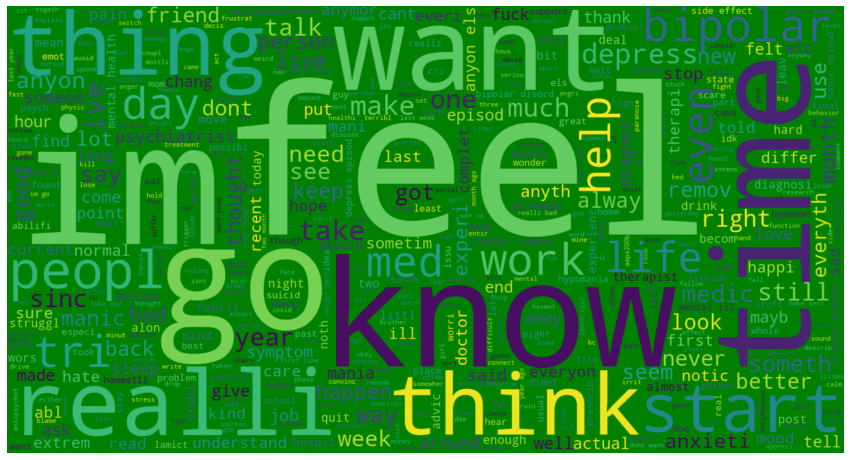

In [39]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

text = " ".join(df[df['subreddit'] == 'bipolar']['selftext'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="green", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

* 'selftext' of 'others' WordCloud

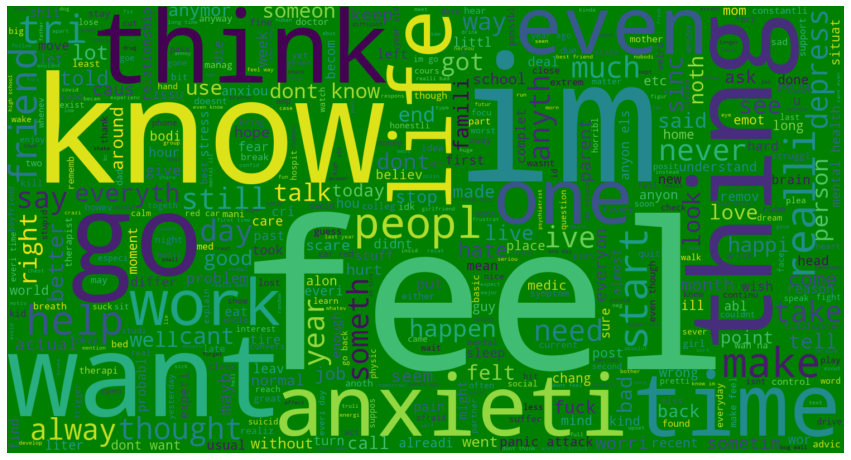

In [40]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

text = " ".join(df[df['subreddit'] == 'others']['selftext'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="green", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# <span style="color:red;">'title' and 'selftext' barplot of words by 'subreddit'</span>

* 'title' barplot of words by 'BPD'

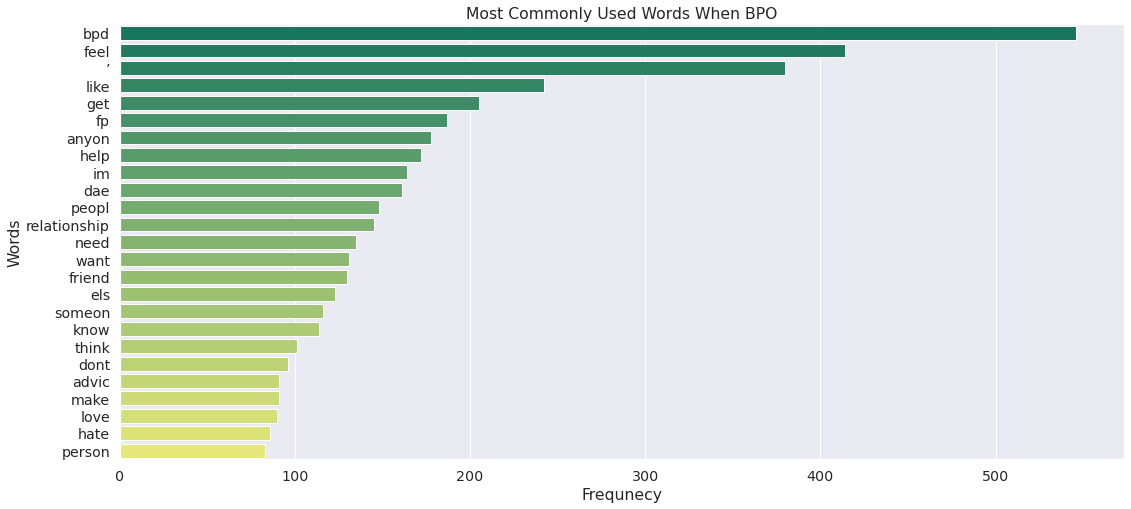

In [41]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

all_nodep_words = []
for sentence in df[df['subreddit'] == 'BPD']['title'].to_list():
    for word in sentence.split():
        all_nodep_words.append(word)

df1= pd.DataFrame(Counter(all_nodep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words When BPO")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

* 'title' barplot of words by 'bipolar'

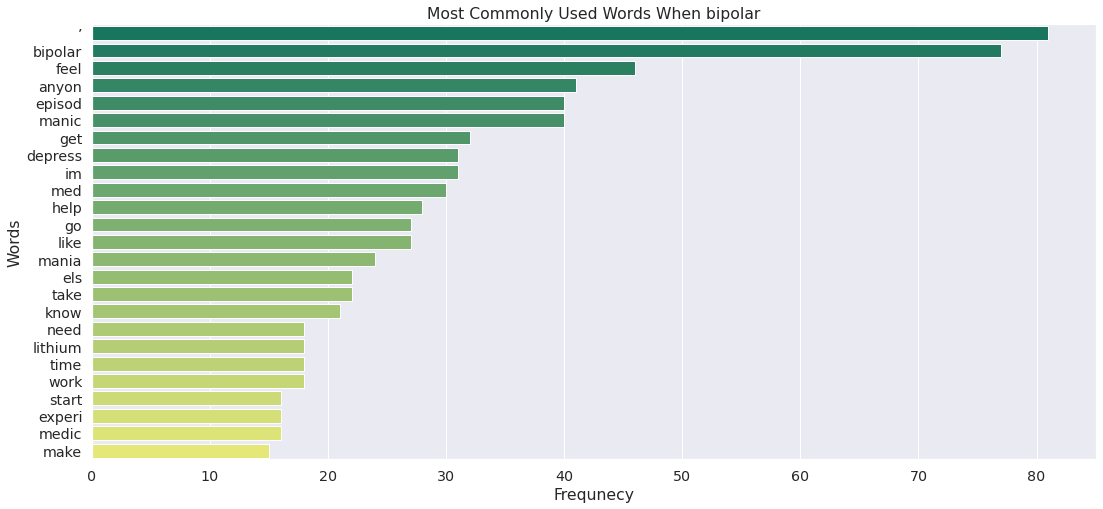

In [42]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

all_nodep_words = []
for sentence in df[df['subreddit'] == 'bipolar']['title'].to_list():
    for word in sentence.split():
        all_nodep_words.append(word)

df1 = pd.DataFrame(Counter(all_nodep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words When bipolar")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

* 'title' barplot of words by 'others'

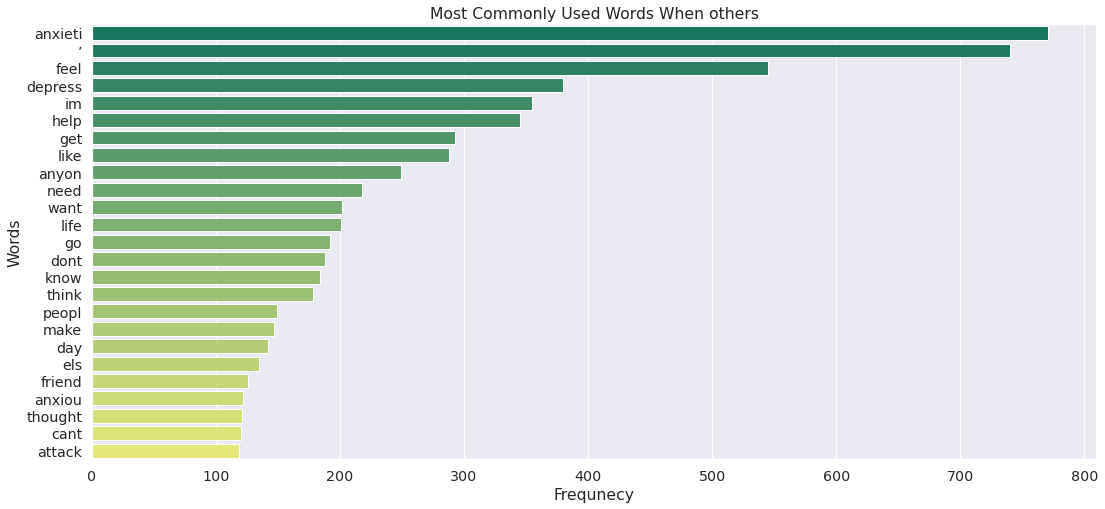

In [43]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

all_nodep_words = []
for sentence in df[df['subreddit'] == 'others']['title'].to_list():
    for word in sentence.split():
        all_nodep_words.append(word)

df1 = pd.DataFrame(Counter(all_nodep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words When others")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

* 'selftext' barplot of words by 'BPD'

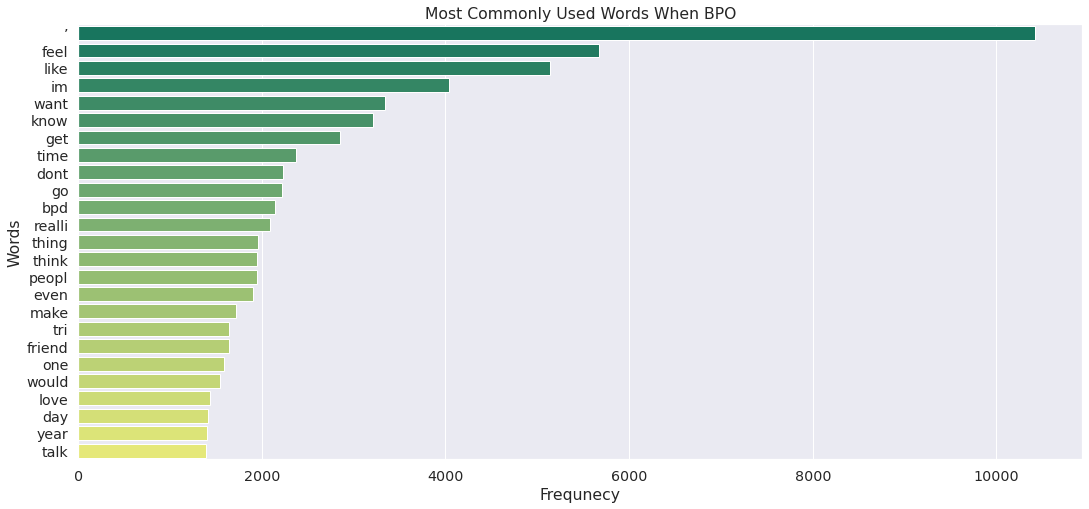

In [44]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

all_nodep_words = []
for sentence in df[df['subreddit'] == 'BPD']['selftext'].to_list():
    for word in sentence.split():
        all_nodep_words.append(word)

df1= pd.DataFrame(Counter(all_nodep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words When BPO")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

* 'selftext' barplot of words by 'bipolar'

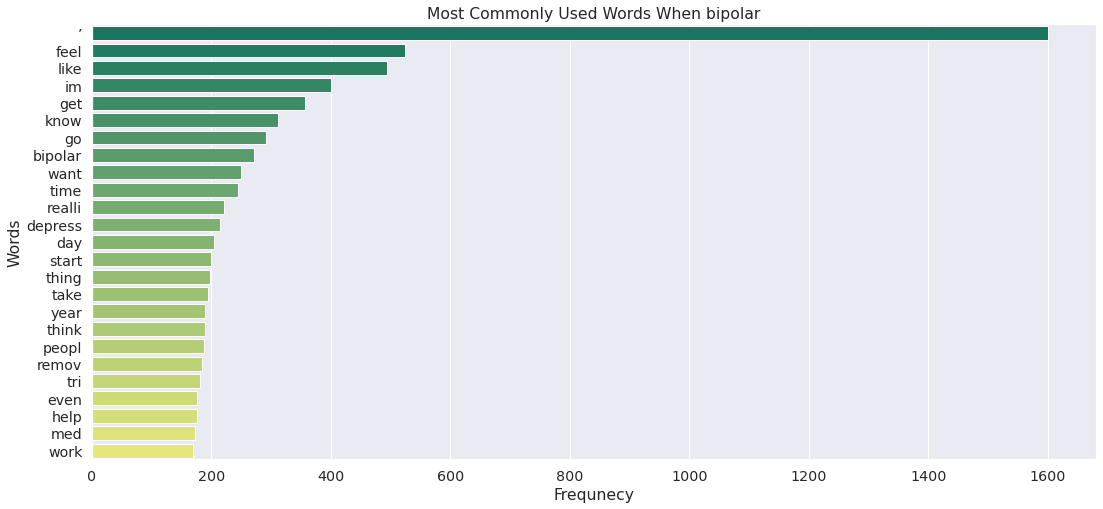

In [45]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

all_nodep_words = []
for sentence in df[df['subreddit'] == 'bipolar']['selftext'].to_list():
    for word in sentence.split():
        all_nodep_words.append(word)

df1 = pd.DataFrame(Counter(all_nodep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words When bipolar")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

* 'selftext' barplot of words by 'others'

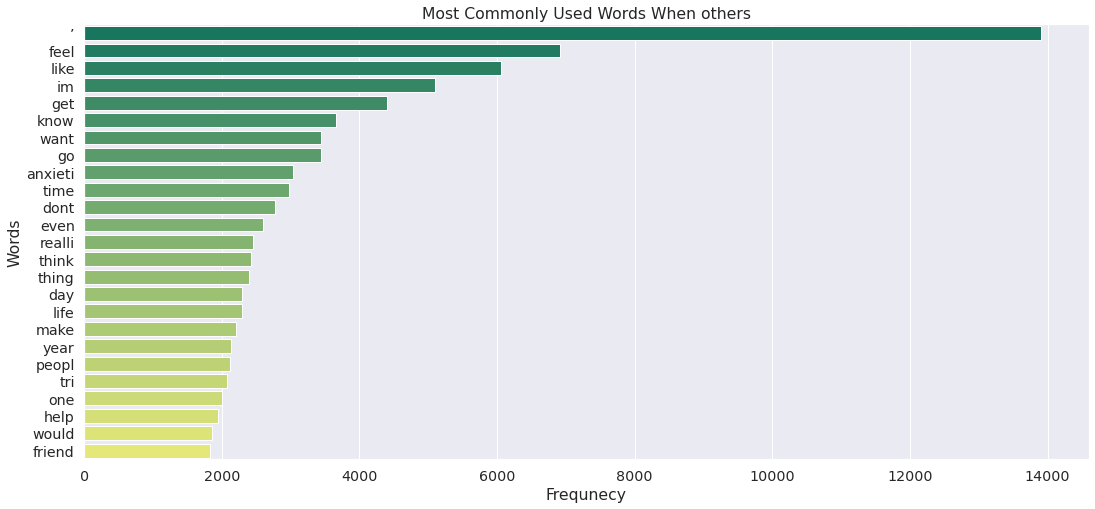

In [46]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

all_nodep_words = []
for sentence in df[df['subreddit'] == 'others']['selftext'].to_list():
    for word in sentence.split():
        all_nodep_words.append(word)

df1 = pd.DataFrame(Counter(all_nodep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words When others")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

# <span style="color:red;">Modeling</span>

# **1) Classify by 'title'**

In [47]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

X = df["title"]
y = df['subreddit'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify = y)

* Vectrization

In [48]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

tfidf = TfidfVectorizer(max_features= 2500, min_df= 2)
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

* Modeling

In [49]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

def train_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    accuracy = round(accuracy_score(y_test, y_pred),3)
    precision = round(precision_score(y_test, y_pred,average="micro"),3)
    recall = round(recall_score(y_test, y_pred,average="micro"),3)

    print(f'Accuracy of the model: {accuracy}')
    print(f'Precision Score of the model: {precision}')
    print(f'Recall Score of the model: {recall}')

    sns.set_context('notebook', font_scale= 1.3)
    fig, ax = plt.subplots(1, 2, figsize = (25,  8))
    ax1 = plot_confusion_matrix(y_test, y_pred, ax= ax[0], cmap= 'YlGnBu')
    ax2 = plot_roc(y_test, y_prob, ax= ax[1], plot_macro= False, plot_micro= False, cmap= 'summer')

* Naive Bayes

Accuracy of the model: 0.706
Precision Score of the model: 0.706
Recall Score of the model: 0.706


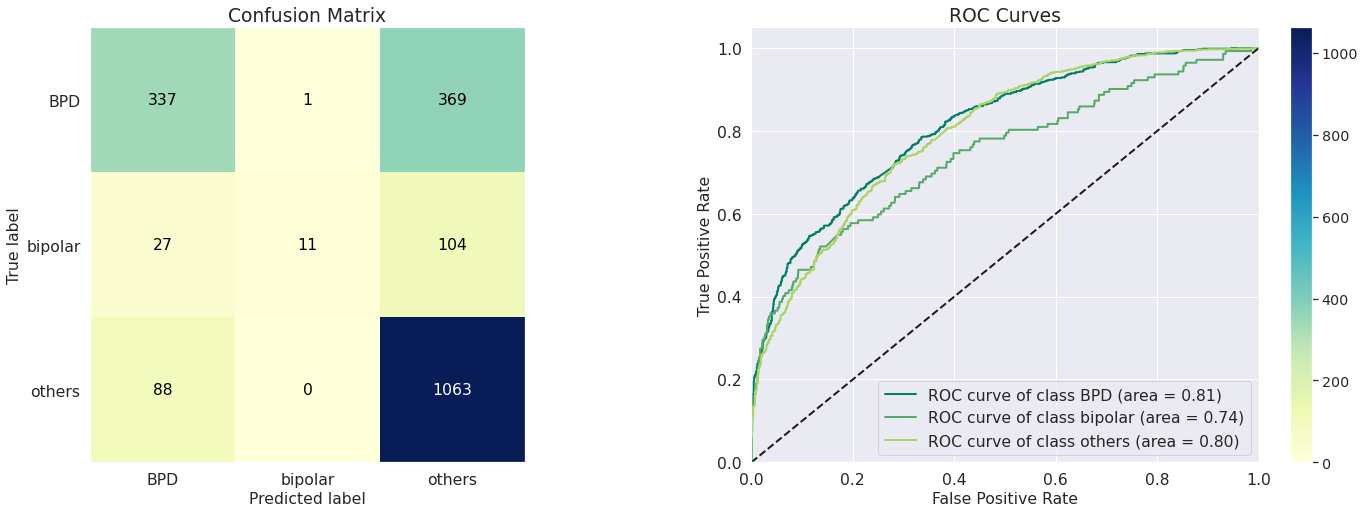

In [50]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

nb = MultinomialNB()
train_model(nb)

* Random Forest

Accuracy of the model: 0.71
Precision Score of the model: 0.71
Recall Score of the model: 0.71


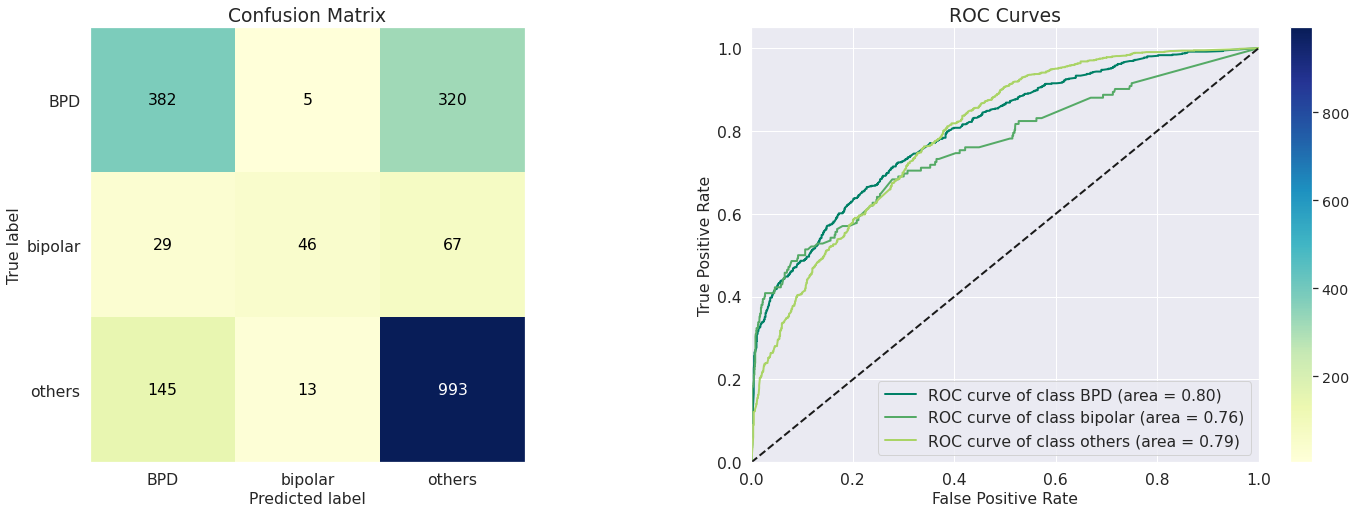

In [51]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

rf = RandomForestClassifier(n_estimators= 100)
train_model(rf)

# **2) Classify by 'selftext'**

In [52]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

X = df["selftext"]
y = df['subreddit'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify = y)

* Vectrization

In [53]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

tfidf = TfidfVectorizer(max_features= 2500, min_df= 2)
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

* Modeling

In [54]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

def train_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    accuracy = round(accuracy_score(y_test, y_pred),3)
    precision = round(precision_score(y_test, y_pred,average="micro"),3)
    recall = round(recall_score(y_test, y_pred,average="micro"),3)

    print(f'Accuracy of the model: {accuracy}')
    print(f'Precision Score of the model: {precision}')
    print(f'Recall Score of the model: {recall}')

    sns.set_context('notebook', font_scale= 1.3)
    fig, ax = plt.subplots(1, 2, figsize = (25,  8))
    ax1 = plot_confusion_matrix(y_test, y_pred, ax= ax[0], cmap= 'YlGnBu')
    ax2 = plot_roc(y_test, y_prob, ax= ax[1], plot_macro= False, plot_micro= False, cmap= 'summer')

* Naive Bayes

Accuracy of the model: 0.73
Precision Score of the model: 0.73
Recall Score of the model: 0.73


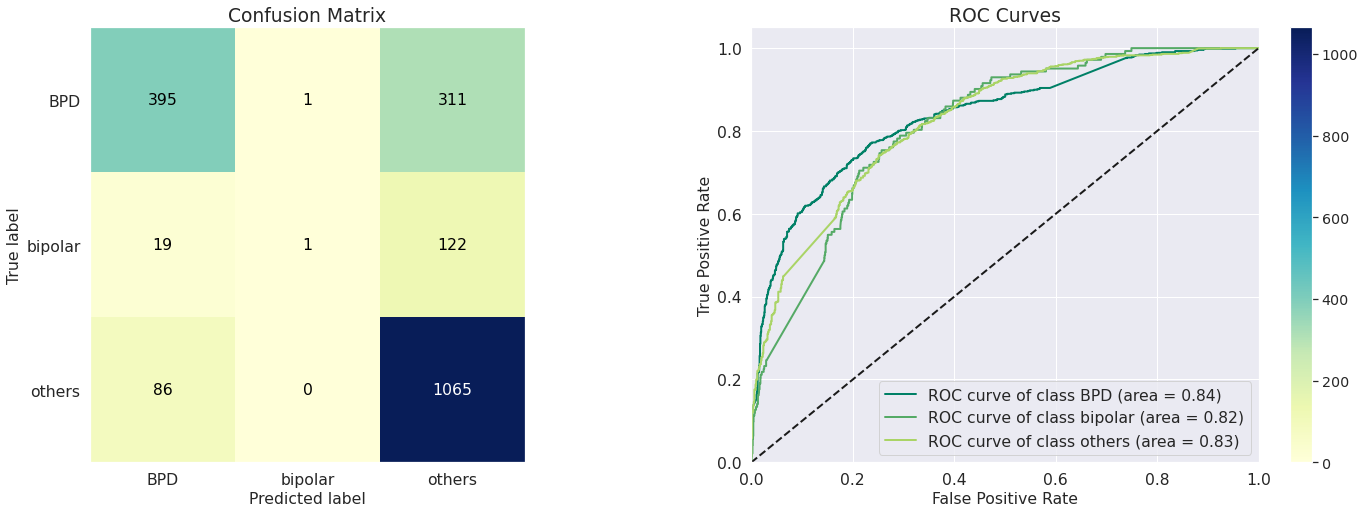

In [55]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

nb = MultinomialNB()
train_model(nb)

* Random Forest

Accuracy of the model: 0.753
Precision Score of the model: 0.753
Recall Score of the model: 0.753


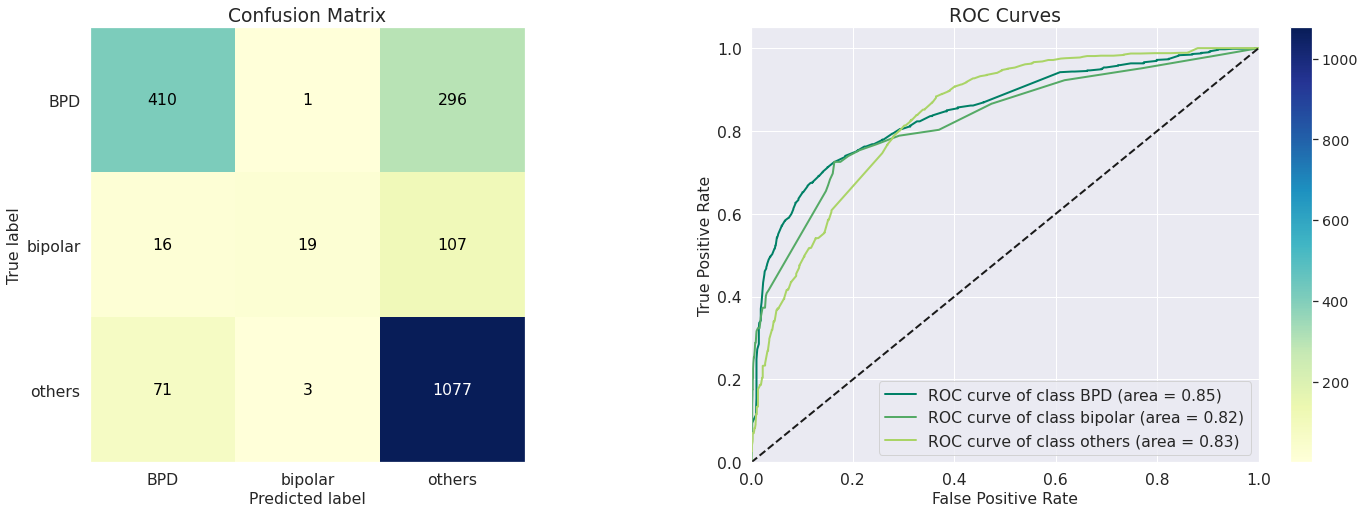

In [56]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

rf = RandomForestClassifier(n_estimators= 100)
train_model(rf)

**It is still in progress. But acutually, it seems to be difficult to classify BPD and bipolar. Especially, in many cases, we may not aware that someone is suffering from bipolar through SNS...And we may also think that someone is suffering from other illness, for example, 'depression', 'Anxiety', 'mentalillness' or 'schizophrenia'.**

reference:
* "What’s the Difference Between BPD and Bipolar Disorder?" by PsychCentral('https://psychcentral.com/disorders/bpd-vs-bipolar-disorder')
* "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

**Thank youu!**